# Práctico 5
1. Entrena y ajusta un árbol de decisión para el conjunto de datos moons siguiendo estos pasos:
  - Usa make_moons(n_samples=10000, noise=0.4) para generar el conjunto de datos moons.
  - Usa train_test_split() para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
  - Usa la búsqueda en cuadrícula con validación cruzada (con la ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. Consejo: prueba varios valores para max_leaf_nodes.
  - Entrena el modelo en el conjunto de entrenamiento completo utilizando estos hiperparámetros y mide su rendimiento en el conjunto de prueba. Deberías obtener una precisión aproximada del 85% al 87%.


In [134]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4)



In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

params = {'max_leaf_nodes': [2, 4, 8, 10, 20, 30, 40, 80, 100]}

grid_search = GridSearchCV(model, params, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 4, 8, 10, 20, 30, 40, 80, 100]})

In [137]:
grid_search.best_params_

{'max_leaf_nodes': 20}

In [138]:
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes=4)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.8545

2. Cargar el dataset de iris. Tomando solamente las variables de largo y ancho del pétalo, entrenar los distintos modelos de Clasificación que se vieron en clase y comparar los bordes generadas para cada una de las Clases.
Modelos:
  - Regresión Softmax
  - Clasificador Estocástico (utilice 10000 iteraciones)
  - SVM lineal
  - SVM con kernel (pruebe diferentes kernels)
  - Naive Bayes
  - Decision Tree (utilice una profundidad máxima de 2)
  - KNeighbors (varie el número de vecinos a 3)
  


In [139]:
# Graficador

### funcion para graficar 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def generate_iris_plot(clasifier):
  x0, x1 = np.meshgrid(
          np.linspace(0, 8, 500).reshape(-1, 1),
          np.linspace(0, 3.5, 200).reshape(-1, 1),
      )

  X_new = np.c_[x0.ravel(), x1.ravel()]

  y_predict = clasifier.predict(X_new)

  zz = y_predict.reshape(x0.shape)

  plt.figure(figsize=(10, 4))
  plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
  plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
  plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.legend(loc="center left", fontsize=14)
  plt.axis([0, 8, 0, 3.5])

  plt.show()

In [140]:
# Load

from sklearn import datasets

X, y = datasets.load_iris(return_X_y = True, as_frame=True)
iris = datasets.load_iris()
X = iris["data"][:,2:]

Score 0.9666666666666667


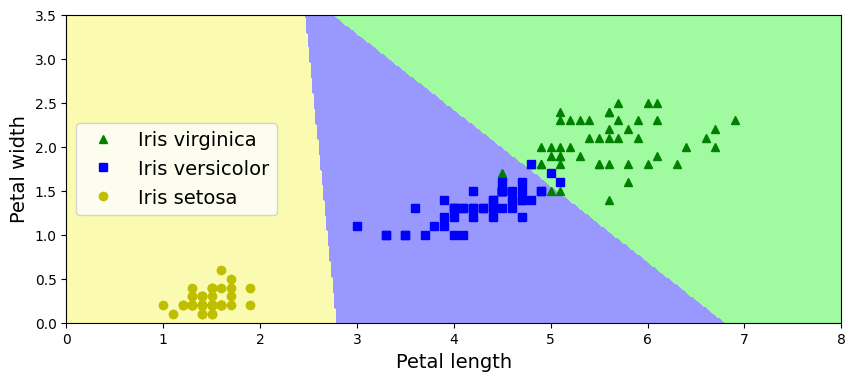

In [141]:
# Softmax
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression

# X, y = load_iris(return_X_y=True)

# clf_softmax = LogisticRegression(random_state=42, max_iter=10000).fit(X, y)

from sklearn.linear_model import LogisticRegression

clf_softmax = LogisticRegression(random_state=42, max_iter=10000).fit(X, y)

print("Score", clf_softmax.score(X, y))

generate_iris_plot(clf_softmax)


Score 0.8933333333333333


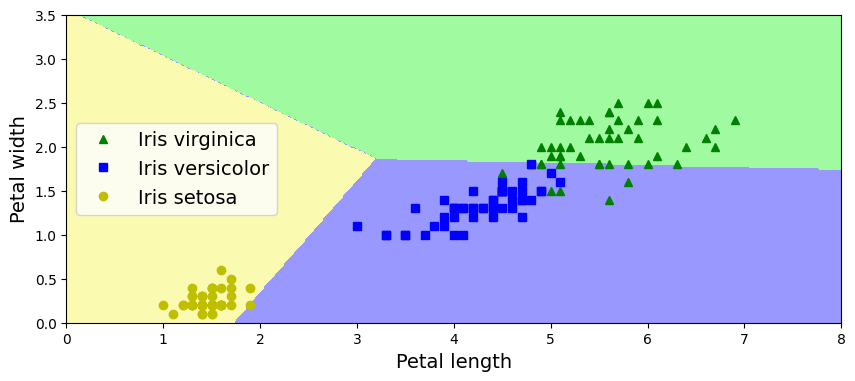

In [142]:
# Estocastico (SDG)

from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(random_state=42).fit(X, y)

print("Score", clf_sgdc.score(X, y))

generate_iris_plot(clf_sgdc)



Score 0.94


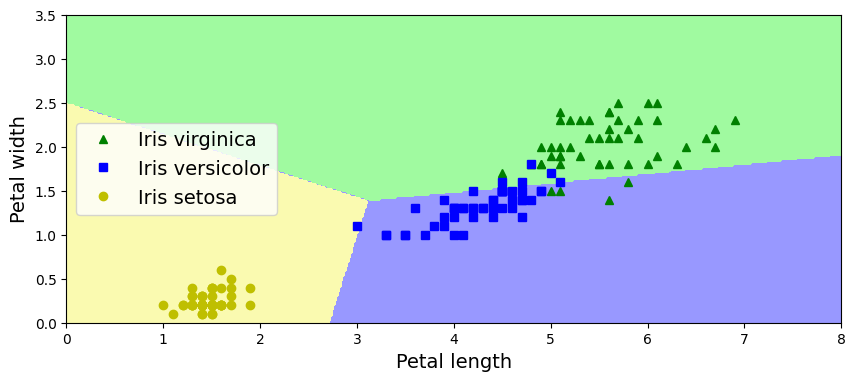

In [143]:
# SVM lineal

from sklearn.svm import LinearSVC

clf_svm = LinearSVC(random_state=42, max_iter=10000).fit(X, y)

print("Score", clf_svm.score(X, y))

generate_iris_plot(clf_svm)



Score 0.9666666666666667


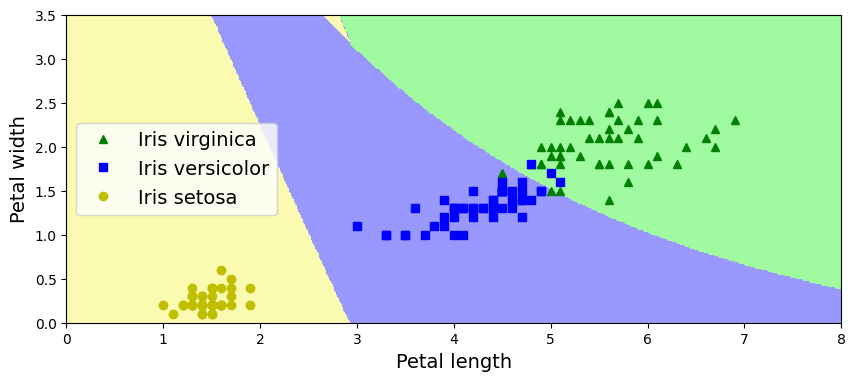

In [144]:
# SVC (poly kernel)
from sklearn.svm import SVC

clf_svcpoly = SVC(kernel="poly", max_iter = 100000)
clf_svcpoly.fit(X,y).fit(X, y)

print("Score", clf_svcpoly.score(X, y))

generate_iris_plot(clf_svcpoly)

Score 0.9533333333333334


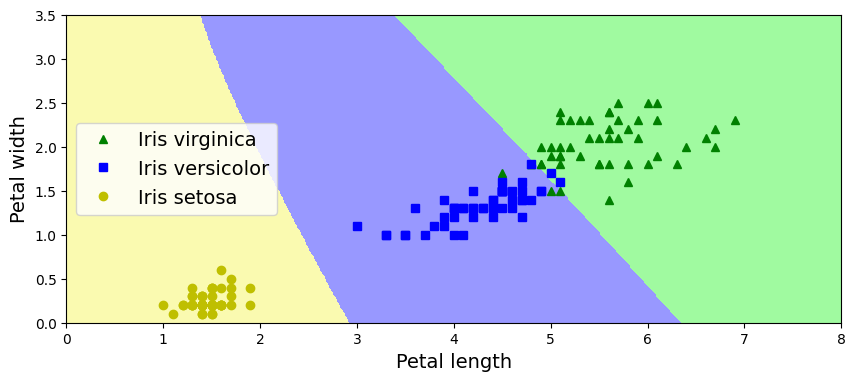

In [145]:
# SVC (rbf kernel)
from sklearn.svm import SVC

clf_svcrbf = SVC(kernel="rbf", max_iter = 100000)
clf_svcrbf.fit(X, y)

print("Score", clf_svcrbf.score(X, y))

generate_iris_plot(clf_svcrbf)

Score 0.96


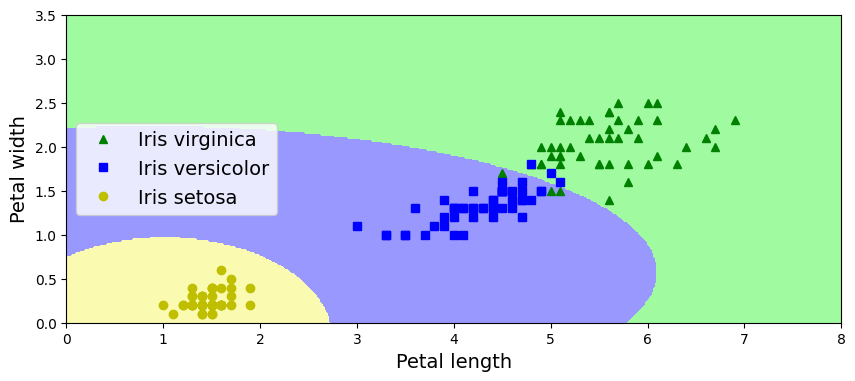

In [146]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB

clf_gauss = GaussianNB()

clf_gauss.fit(X, y)

print("Score", clf_gauss.score(X, y))

generate_iris_plot(clf_gauss)

Score 0.96


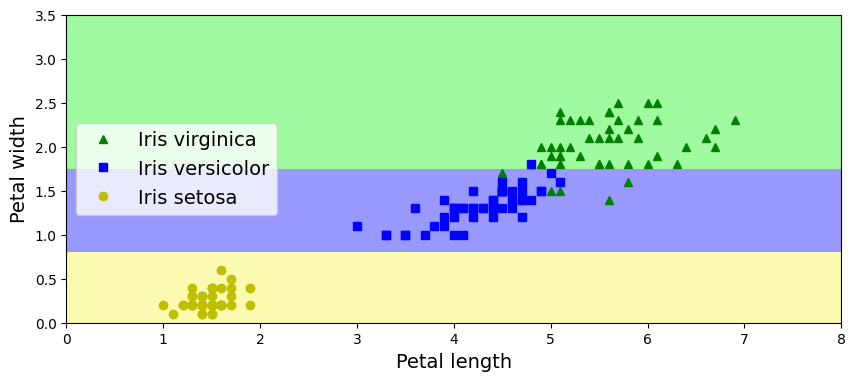

In [147]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth = 2)
clf_tree.fit(X, y)

print("Score", clf_tree.score(X, y))

generate_iris_plot(clf_tree)

Score 0.98


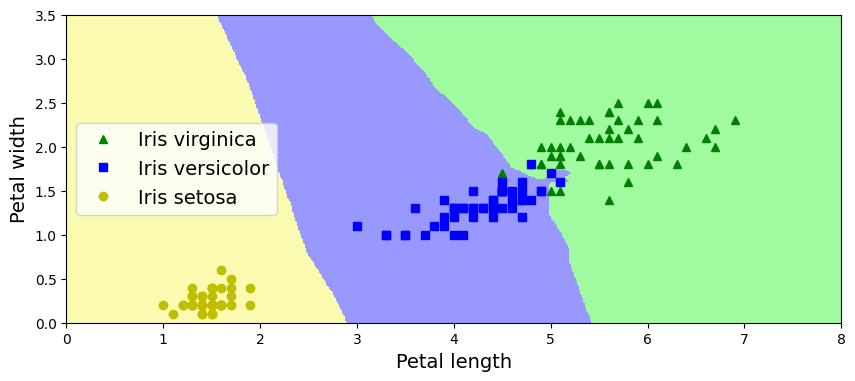

In [148]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X, y)

print("Score", clf_knn.score(X, y))

generate_iris_plot(clf_knn)

3. Construya un modelo de ensamble de votación con los modelos anteriores.


In [149]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', clf_softmax), ('sgd', clf_sgdc), ('svm', clf_svm), ('svcp', clf_svcpoly), ('svcr', clf_svcrbf)
                , ('tree', clf_tree), ('knn', clf_knn)],
    voting='hard'
)

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('svm',
                              LinearSVC(max_iter=10000, random_state=42)),
                             ('svcp', SVC(kernel='poly', max_iter=100000)),
                             ('svcr', SVC(max_iter=100000)),
                             ('tree', DecisionTreeClassifier(max_depth=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [151]:
voting_clf.score(X_test, y_test)

1.0

4. Cree una muestra unidimensional con *y* dependiendo cuadraticamente de *x*, entrenar los distintos modelos de regresión que se vieron en clase y comparar las aproximaciones graficandolas. ¿En caso de querer extrapolar, que modelos no parecen ser una buena elección?
Modelos:
  - Regresión Lineal
  - Regresión Polinomica
  - Regresión Lineal Estocástica
  - SVM lineal
  - SVM con kernel
  - Decision Tree
  - KNeighbors
  


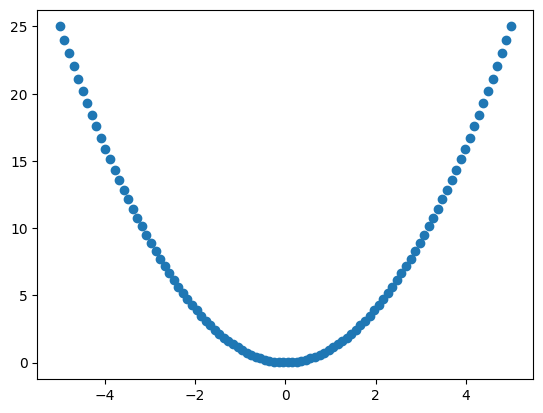

In [152]:
# muestra

import numpy as np
import matplotlib.pyplot as plt

# Crear una muestra unidimensional con y dependiendo cuadráticamente de x
x = np.linspace(-5, 5, num=100)
y = x**2

# Graficar la muestra
plt.scatter(x, y)
plt.show()


Linear Regression R^2 score: -0.056401985340495786


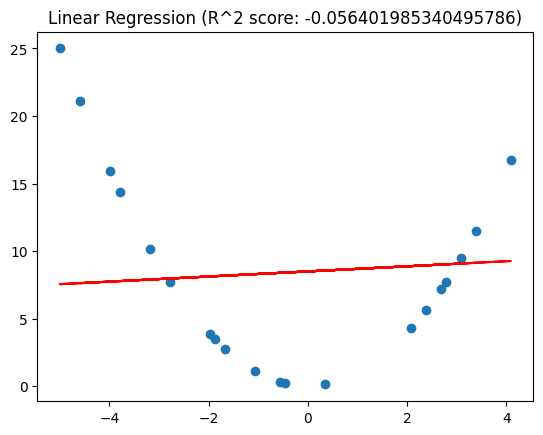

Polynomial Regression R^2 score: 1.0


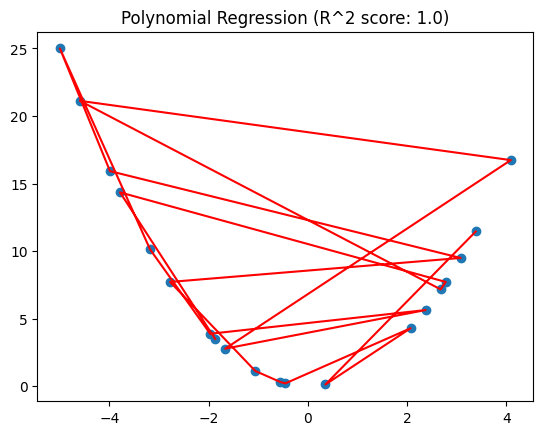

Stochastic Gradient Descent Regression R^2 score: -0.04216842999160186


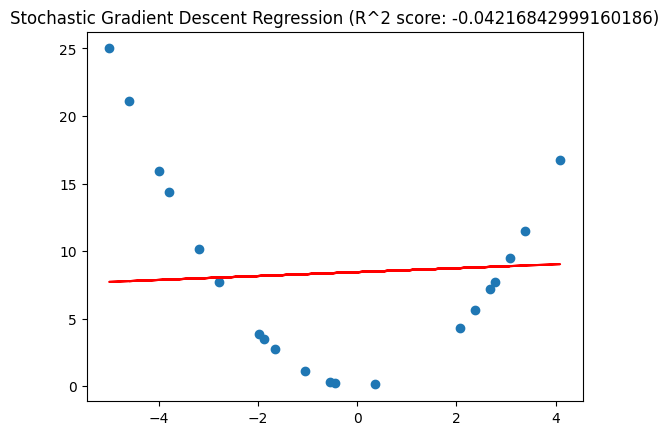

Linear SVM Regression R^2 score: -0.12279964367167606


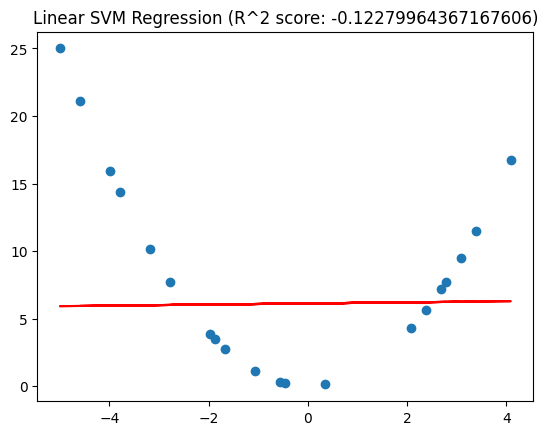

Kernel SVM Regression R^2 score: 0.9009586338400982


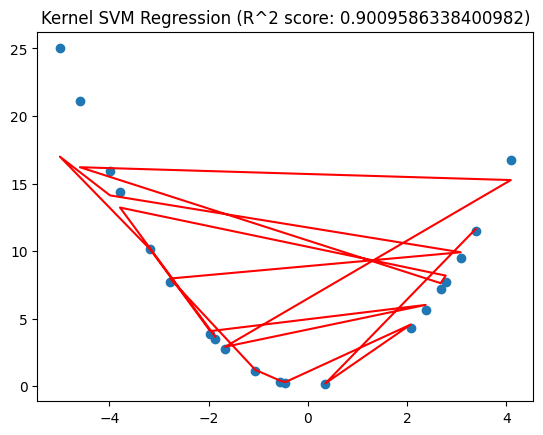

Decision Tree Regression R^2 score: 0.9929272279580932


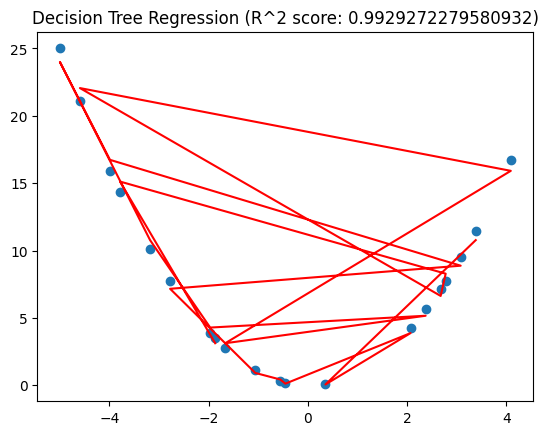

K-Neighbors Regression R^2 score: 0.986037645265174


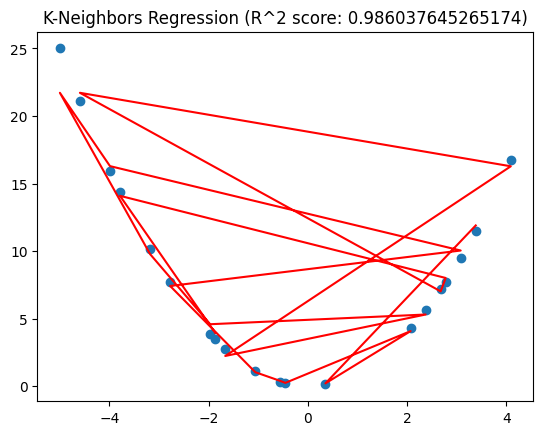

In [153]:
# modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar los distintos modelos de regresión
models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression", make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ("Stochastic Gradient Descent Regression", SGDRegressor(random_state=42)),
    ("Linear SVM Regression", SVR(kernel="linear")),
    ("Kernel SVM Regression", SVR(kernel="rbf")),
    ("Decision Tree Regression", DecisionTreeRegressor(random_state=42)),
    ("K-Neighbors Regression", KNeighborsRegressor(n_neighbors=5))
]

for name, model in models:
    # Ajustar el modelo a los datos de entrenamiento
    model.fit(X_train.reshape(-1, 1), y_train)
    
    # Evaluar el rendimiento del modelo en los datos de prueba
    y_pred = model.predict(X_test.reshape(-1, 1))
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir el nombre del modelo y su coeficiente de determinación
    print(name, "R^2 score:", r2)

    # Graficar la aproximación del modelo junto con los datos
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='red')
    plt.title(name + " (R^2 score: " + str(r2) + ")")
    plt.show()


Los modelos que no son buena opcion son aquellos que tienen un `bajo puntaje de R^2`:

- Linear Regression
- SGD
- SVM Linear

5. Al igual que con los clasificadores, contruya un modelo de ensamble de votación, pero esta vez de regresión.

In [156]:
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import load_iris

# datos iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelos
model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=4)
model3 = KNeighborsRegressor(n_neighbors=5)
model4 = SVR(kernel='rbf')
model5 = SVR(kernel='poly', degree=3)
model6 = LinearRegression()

voting_reg = VotingRegressor([('lr', model1), ('dt', model2), ('knn', model3), 
                              ('rbf', model4), ('poly', model5), ('linear', model6)])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(max_depth=4)),
                            ('knn', KNeighborsRegressor()), ('rbf', SVR()),
                            ('poly', SVR(kernel='poly')),
                            ('linear', LinearRegression())])

# Preguntas teoricas
### Regresión
1. ¿Qué algoritmo de entrenamiento de Regresión Lineal puedes usar si tienes un conjunto de entrenamiento con millones de características?

- SGD (estocastico)

2. Supongamos que las características en tu conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir por esto y cómo? ¿Qué puedes hacer al respecto?

- los que miden utilizando distancia, como la regresion lineal.

3. ¿Puede el Descenso de Gradiente quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística?

- si

4. ¿Todos los algoritmos de Descenso de Gradiente conducen al mismo modelo, siempre y cuando los dejes correr el tiempo suficiente?

- no, todo depende de los hiperparametros y tasa de aprendizaje

5. Supongamos que usas Descenso de Gradiente por lotes y graficas el error de validación en cada época. Si notas que el error de validación consistentemente aumenta, ¿qué es lo que probablemente está sucediendo? ¿Cómo puedes solucionarlo?

- es probable que estemos sobreajustando, deberiamos revisar con una validacion cruzada


6. ¿Es una buena idea detener inmediatamente el Descenso de Gradiente por mini-lotes cuando el error de validación aumenta?

- el aumento de error puede ser temporal


7. ¿Qué algoritmo de Descenso de Gradiente (entre los que discutimos) llegará más rápido a la cercanía de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?

- el por lotes es mas lento pero converge al minimo si la tasa de aprendizaje es muyy chica. el estocastico es mas rapido pero puede oscilar. la elección del algoritmo y la tasa de aprendizaje correcta pueden hacer que todos los algoritmos converjan.


8. Supongamos que estás utilizando Regresión Polinómica. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el error de validación. ¿Qué está sucediendo? ¿Cuáles son tres formas de solucionarlo?

- reducir la complejidad del modelo, aumentar la cantidad de datos de entrenamiento o utilizar técnicas de regularización como Regresión Ridge o Lasso
 

9. Supongamos que estás utilizando Regresión Ridge y notas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Dirías que el modelo sufre de sesgo alto o de varianza alta? ¿Deberías aumentar el hiperparámetro de regularización α o reducirlo?

- el modelo sufre de sesgo alto, reducir el hiperparámetro de regularización α podría ayudar a reducir el sesgo


10. ¿Por qué querrías usar:
  - Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin regularización)?
  - Lasso en lugar de Regresión Ridge?
  - Elastic Net en lugar de Lasso?


- Regresión Ridge se usa cuando se desea evitar el sobreajuste y tener una solución única, incluso si hay características altamente correlacionadas en el conjunto de datos.

- Lasso se usa cuando se desea seleccionar un subconjunto de características importantes y reducir la complejidad del modelo.

- Elastic Net se usa cuando se desea utilizar tanto Regresión Ridge como Lasso juntos, lo que puede ser útil cuando hay características altamente correlacionadas en el conjunto de datos y se desea seleccionar un subconjunto de características importantes.



11. Supongamos que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de Regresión Logística o uno de Regresión Softmax?

- seria mejor utilizar softmax ya que si usamos dos clasificadores de regresion cada uno solo podra clasificar en una de las dos clases sin tener en cuenta la otra.


### SVM
1. ¿Cuál es la idea fundamental detrás de las Máquinas de Vectores de Soporte?

- encontrar un hiperplano que separe de la mejor manera posible dos conjuntos de datos

2. ¿Qué es un vector de soporte?

- instancia de entrenamiento que se encuentra EN o cerca del margen de decision


3. ¿Por qué es importante escalar las entradas al usar SVM?

- porque tuliza medidas de distancia para encontrar su solucion, si existen diferentes escalas puede desempeniarse mal


4. ¿Puede un clasificador SVM producir un puntaje de confianza al clasificar una instancia? ¿Y una probabilidad?

- puede producir un puntaje de confianza al clasificar una instancia, que es la distancia desde la instancia hasta el hiperplano de decisión, pero no puede producir una probabilidad


5. ¿Deberías usar la forma primal o dual del problema SVM para entrenar un modelo en un conjunto de entrenamiento con millones de instancias y cientos de características?

- es mejor utilizar la forma dual del problema SVM cuando el número de instancias es menor que el número de características


6. Digamos que has entrenado un clasificador SVM con un kernel RBF, pero parece subajustarse al conjunto de entrenamiento. ¿Deberías aumentar o disminuir γ (gamma)? ¿Y C?

- Debería aumentarse gamma (γ) para hacer que el modelo sea más complejo. Si el modelo está sobreajustando, debería reducirse γ. El parámetro C controla el trade-off entre la maximización del margen y la minimización del error de clasificación. Un valor más alto de C significa que se permiten más errores de clasificación en el conjunto de entrenamiento para lograr un margen más amplio.


### Árboles de decisiones
1. ¿Cuál es la profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias?

- 31


2. ¿La impureza de Gini de un nodo es generalmente menor o mayor que la de su padre? ¿Es generalmente menor/mayor o siempre menor/mayor?

- la impureza de Gini de un nodo es menor que la de su padre, ya que cada nodo divide el conjunto de datos en subconjuntos más puros


3. Si un árbol de decisión está sobreajustando el conjunto de entrenamiento, ¿es buena idea intentar disminuir max_depth?

- si, ya que disminuir max_depth puede ayudar a reducir el sobreajuste y mejorar el desempeño del modelo en el conjunto de prueba.


4. Si un árbol de decisión está subajustando el conjunto de entrenamiento, ¿es buena idea intentar escalar las características de entrada?

- no


5. Si tarda una hora en entrenar un árbol de decisión en un conjunto de entrenamiento que contiene 1 millón de instancias, ¿cuánto tiempo aproximado tomará entrenar otro árbol de decisión en un conjunto de entrenamiento que contiene 10 millones de instancias?

- 10hs


6. Si su conjunto de entrenamiento contiene 100,000 instancias, ¿establecer presort=True acelerará el entrenamiento?

- es menos efectivo en datos grandes, por lo que no lo acelerara tanto. 

